In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
train_data = pd.read_csv('/content/train.csv') # load the training data
test_data = pd.read_csv('/content/test.csv') # load the test data
print(train_data.columns)   # visualise the columns
train_data.head()   # visualise a subset of the training data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# choose the columns to be used for training and testing, here we discard columns which do not have numerical values
columns = ['Id', 'LotFrontage', 'MSZoning', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']
#data_no_missing_values = train_data.dropna()
#print(data_no_missing_values)

# remove extra columns from the train data
print(f'Train Data Size: {train_data.shape}')
train_data = train_data[columns]
print(train_data.head())

# remove extra columns from the test data
print(f'Test Data Size: {test_data.shape}')
test_data = test_data[columns[:-1]]
print(test_data.head())

Train Data Size: (1460, 81)
   Id  LotFrontage MSZoning  LotArea  ...  PoolArea  MiscVal  MoSold  SalePrice
0   1         65.0       RL     8450  ...         0        0       2     208500
1   2         80.0       RL     9600  ...         0        0       5     181500
2   3         68.0       RL    11250  ...         0        0       9     223500
3   4         60.0       RL     9550  ...         0        0       2     140000
4   5         84.0       RL    14260  ...         0        0      12     250000

[5 rows x 30 columns]
Test Data Size: (1459, 80)
     Id  LotFrontage MSZoning  LotArea  ...  ScreenPorch  PoolArea  MiscVal  MoSold
0  1461         80.0       RH    11622  ...          120         0        0       6
1  1462         81.0       RL    14267  ...            0         0    12500       6
2  1463         74.0       RL    13830  ...            0         0        0       3
3  1464         78.0       RL     9978  ...            0         0        0       6
4  1465         43.0  

**Multicollinearity**

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.
One of the best ways to check for multicollinearity is through VIF (variance inflation factor). VIF produces a measure that estimates the degree to which the square root of the standard error of an estimate is bigger, compared to a situation when the variable was completely uncorrelated with the other predictors. The numerical value for VIF tells us (in decimal form) the percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells us that the variance of a particular coefficient is 90% bigger than what we would expect if there was no multicollinearity — if there was no correlation with other predictors.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#We try adding some of the columns with float/int data
variables = train_data[['LotArea', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','GrLivArea']]
vif = pd.DataFrame()
df = add_constant(variables)
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif["features"] = df.columns

print(vif)#Notice: too hight VIF!!!!

#Let's drop GrLivArea
variables = train_data[['LotArea', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF']]
vif = pd.DataFrame()
df = add_constant(variables)
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif["features"] = df.columns

print(vif)# The values look much better now!

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


          VIF     features
0   12.192488        const
1    1.135481      LotArea
2    1.243010    BsmtUnfSF
3    3.341831  TotalBsmtSF
4   67.660946     1stFlrSF
5   83.304228     2ndFlrSF
6  117.646907    GrLivArea
         VIF     features
0  12.188855        const
1   1.135390      LotArea
2   1.240689    BsmtUnfSF
3   3.334156  TotalBsmtSF
4   3.169033     1stFlrSF
5   1.068540     2ndFlrSF


In [5]:
train_data = train_data.drop(['GrLivArea'], axis = 1) #Therefore, we drop this column.
test_data = test_data.drop(['GrLivArea'], axis = 1)

In [6]:
train_data = pd.get_dummies(train_data) #For handling categorical data
test_data = pd.get_dummies(test_data)

In [9]:

# function for pre-processing the data
def pre_process(data, train=True, val_split=0.8, seed=1234):
    # remove the NaN values from data
    for i in range(data.shape[1]):
        data = data.iloc[data.iloc[:, i].notna().to_numpy()]
    if train:
        data = data.iloc[:, 1:] # exclude the "Id" column
        np.random.seed(seed)
        split = val_split
        indices = np.arange(data.shape[0])  
        np.random.shuffle(indices)  # shuffle indices for validation split
        mu = data.iloc[:, :-1].mean(0)  # calculate mean
        sigma = data.iloc[:, :-1].std(0)    # calculate std
        # split the train and validation sets
        X_train, y_train, X_val, y_val = data.iloc[indices[:int(split*len(indices))], :-1], data.iloc[indices[:int(split*len(indices))], -1], data.iloc[indices[int(split*len(indices)):], :-1], data.iloc[indices[int(split*len(indices)):], -1]   

        X_train -= mu
        X_train /= sigma    # normalize the train set
        X_val -= mu
        X_val /= sigma  # normalize the validation set
        X_train = np.c_[np.ones(len(X_train),dtype='int64'), X_train.to_numpy()]    # append 1s to the features in train set
        X_val = np.c_[np.ones(len(X_val),dtype='int64'), X_val.to_numpy()]  # append 1s to the features in validation set
        
        print(f'\nTraining Size: {X_train.shape[0]}')
        print(f'Validation Size: {X_val.shape[0]}')
        print(f'Number of features: {X_train.shape[1]}')

        return X_train, y_train.to_numpy(), X_val, y_val.to_numpy()

    else:
        data = data.iloc[:, 1:] # exclude the "Id" column
        mu = data.mean(0)   # calculate mean
        sigma = data.std(0) # calculate std
        X_test = data
        X_test -= mu
        X_test /= sigma # normalize the test set
        X_test = np.c_[np.ones(len(X_test),dtype='int64'), X_test.to_numpy()]    # append 1s to the features in test set
        
        print(f'Testing Size: {X_test.shape[0]}')
        return X_test

In [34]:
X_train, y_train, X_val, y_val = pre_process(train_data)    # pre-process the training data
X_test = pre_process(test_data, train=False) 


Training Size: 956
Validation Size: 239
Number of features: 32
Testing Size: 1218


In [35]:
reg = LinearRegression().fit(X_train, y_train)  # instantiate the sklearn linear regression model
reg.score(X_val, y_val) 

1.0

In [36]:
# normalised mse using sklearn model weights
predictions = reg.predict(X_val)
mse = (predictions - y_val) ** 2
mse = np.sum(mse) / (len(y_val) * np.max(mse))
print(mse)

0.010008498673386788


In [37]:
reg.predict(X_test) # make predictions on test set using sklearn model weights

array([-1.71790617,  0.34602497,  0.34594627, ...,  0.34595807,
        0.34600503,  0.34596726])

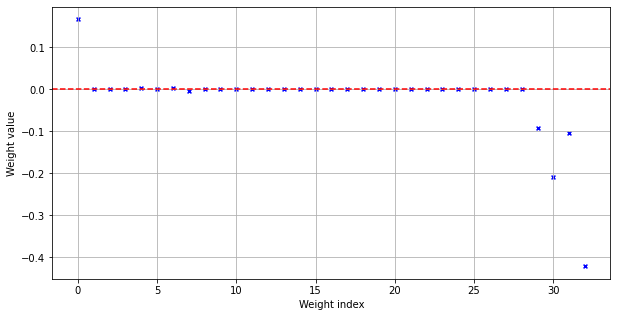

In [38]:
# plotting the sklearn model weights
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(reg.coef_) + 1), np.c_[np.array([reg.intercept_]).reshape(-1, 1).T, reg.coef_.reshape(-1, 1).T].reshape(-1), 15, 'b', 'x')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid()
plt.ylabel('Weight value')
plt.xlabel('Weight index')
plt.show()